# [Initial Environment]
- pandas getting started: https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html#
- 10 mins to pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#

In [8]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
from __future__ import print_function
#................................................................................
# Add libPython\.. into PYTHONPATH
import sys
sys.path.append(r'..')
#................................................................................
import libPython.core.util as util
import libPython.core.util_ex as util_ex


import pandas as pd
pd.__version__

'1.4.1'

基本操作

In [9]:
# create dataframe from diction list
# 每一個 key: list 是一個column ; 每個column name是一個feature , 擺放同樣性質的資料
df = pd.DataFrame(
    {
        "Name": [
            "Clouds",
            "Vivian",
            "Latis Lee",
            "Claire"
        ],
        "Age": [45, 55, 12, 9],
        "Sex": ["male", "female", "male", "female"],
        "Height": [170, 168, 180, 150]
    }
)

df #一個DataFrame

,Name,Age,Sex,Height
0,Clouds,45,male,170
1,Vivian,55,female,168
2,Latis Lee,12,male,180
3,Claire,9,female,150


In [10]:
#...................................
# 特定單一column (Series)
#...................................
df['Age'] #傳回column, 是一個Series

#...................................
# 傳回特定的rows組成的 DataFrame
#...................................
df[df['Age'] > 18] #傳回符合條件的DataFrame
df[ (df['Age'] > 18) & (df['Sex'] == 'female') ] #傳回符合條件的DataFrame (1).用 & | (2).每個boolean要括號
df[['Age']] #DataFrame <-> df['Age'] 傳回Series
df[['Age', 'Height']] #DataFrame 
df[1:3] #傳回指定row範圍的DataFrame

#...................................
# 選擇特定 rows & columns
#...................................
df.loc[df['Age']>18, 'Name'] #傳回Series
df.loc[df['Age']>18, ['Name','Sex']] #傳回 DataFrame
df.iloc[1:3, 0:3] #傳回 DataFrame. [row, column] range


,Name,Age,Sex
1,Vivian,55,female
2,Latis Lee,12,male


In [11]:
#...................................
# Transpose 轉置表格
#...................................
tdf = df[['Age', 'Height']].transpose() #將數字的columns轉置
tdf[0] #轉置後沒有columns,只能用 0,1,2 index存取
tdf.columns = df['Name'] #設定名字爲轉置後的column, 設置後就可以用名字存取,但就不能用index存取column了
tdf['Clouds'] #設定columns後,就可以用名字存取
# tdf.plot.line()
# tdf.plot.bar()


Age        45
Height    170
Name: Clouds, dtype: int64

In [12]:
#...................................
# Create 單一Series, 新增一個column
#...................................
weight = pd.Series([22, 50, 30], name='Weight')
new_df = df.assign( Weight_Name=weight ) #產生新的DataFrame, 多一個Column. Weight_Name 是column name
new_df = df.join(weight) #產生新的DataFrame, 多一個Column. Column名字用Series的name
df['Weight'] = weight #直接新增在原來的DataFrame
del df['Weight'] #殺掉一個Column
df['100xAges'] = df['Age'] * 100

#...................................
# Create 單一Series, 新增一個row
#...................................
# TODO: 使用append, 連接兩個一樣的DataFrame


修改column name

In [13]:
#...................................
# 改變column名字
#............. ......................
df.rename(columns={'Age':'年齡'}).head() #改變column名字

#...................................
# 改變column名字
#............. ......................
rename_dic = {'Age':"年齡"}
df.rename(rename_dic, axis=1).head() #在 pandas 裡大部分函式預設處理的軸為列（row）：以 axis=0 表示；而將 axis 設置為 1 則代表你想以行（column）為單位套用該函式。

,Name,年齡,Sex,Height,100xAges
0,Clouds,45,male,170,4500
1,Vivian,55,female,168,5500
2,Latis Lee,12,male,180,1200
3,Claire,9,female,150,900


修改數值

In [14]:
#...................................
# column 垂直修改數值 - 1
#...................................
def name_add_mr( series ):
    return [ "Mr " + str(x)  for x in series]
new_df = df.apply(name_add_mr, axis=0) #axis=0: 一次傳進一個column Series進來apply function
new_df

,Name,Age,Sex,Height,100xAges
0,Mr Clouds,Mr 45,Mr male,Mr 170,Mr 4500
1,Mr Vivian,Mr 55,Mr female,Mr 168,Mr 5500
2,Mr Latis Lee,Mr 12,Mr male,Mr 180,Mr 1200
3,Mr Claire,Mr 9,Mr female,Mr 150,Mr 900


In [15]:
#...................................
# column 垂直修改數值 - 2
#...................................
df['Age'] = df['Age'].apply(lambda s: s*10)
df
df['Age'] = df['Age'].apply(lambda s: s/10)
df

,Name,Age,Sex,Height,100xAges
0,Clouds,45.0,male,170,4500
1,Vivian,55.0,female,168,5500
2,Latis Lee,12.0,male,180,1200
3,Claire,9.0,female,150,900


In [16]:
#...................................
# row 水平修改數值
#...................................
def name_add_mr( series ):
    if series['Sex'] == 'male':
        series['Name']="Mr. "+ series['Name']
    else:
        series['Name']="Ms. "+ series['Name']
    return series
new_df = df.apply(name_add_mr, axis=1) #axis=1: 一次傳進一個row Series進來apply function
new_df

,Name,Age,Sex,Height,100xAges
0,Mr. Clouds,45.0,male,170,4500
1,Ms. Vivian,55.0,female,168,5500
2,Mr. Latis Lee,12.0,male,180,1200
3,Ms. Claire,9.0,female,150,900


字串操作

In [17]:
#...................................
# 字串操作
#...................................
df[df['Name'].isin(['Vivian'])]
df[df['Name'].str.contains('Vivi')]

,Name,Age,Sex,Height,100xAges
1,Vivian,55.0,female,168,5500


統計資料

In [18]:
df.index
df.columns
#...................................
# 數值統計資料
#...................................
df['Age'].max() #傳回數值
df['Age'].count()
df['Age'].mean()
df['Age'].std()
df.max() #傳回Series, 每個Column的最大值
df.describe() #傳回DataFrame, 每個數值形態的Column的統計值

#...................................
# Group By
#...................................
df.groupby('Sex')['Age'].mean() #傳回DataFrameGroupBy

#...................................
# Group By
#...................................
df.dtypes #傳回 Series. 各欄位data type
df.info() #傳回 DataFrame. 各欄位data type
df.shape #dimension
df['Age'] > 18 #傳回 內含Boolean值的Series
df.notna()
df.notnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      4 non-null      object 
 1   Age       4 non-null      float64
 2   Sex       4 non-null      object 
 3   Height    4 non-null      int64  
 4   100xAges  4 non-null      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 288.0+ bytes


,Name,Age,Sex,Height,100xAges
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True


讀取資料

In [437]:
#...................................
#從剪貼簿讀取資料
#...................................
df_clip = pd.read_clipboard()
#...................................
#從Excel讀取資料
#...................................
df_excel = pd.read_excel(r"C:\Users\cloud\GoogleDrive\MyDOC-G\family folder - 家庭目錄\compare - real estate 房地產.xlsx", sheet_name=1)


Pandas Plot

<AxesSubplot:ylabel='Frequency'>

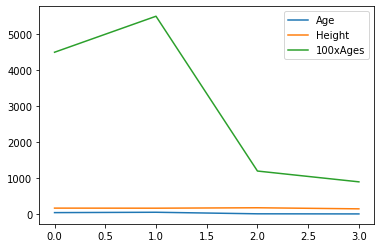

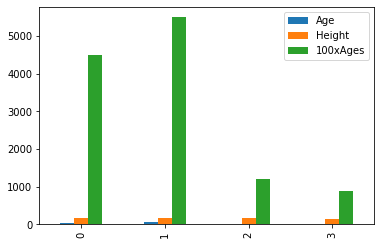

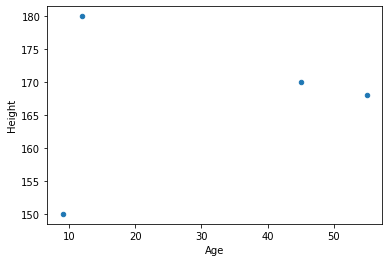

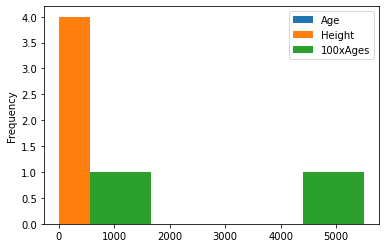

In [401]:

df.plot.line() #line: 每個column 一條線
df.plot.bar() #bar: 與line相反，每個值一個bar
df.plot.scatter(x='Age', y='Height')
df.plot.hist()
# dir(df.plot) #列出支援的圖形

Plotly Plot

In [412]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.line(df, x='Name', y='Age')
fig.show()
fig = px.bar(df, x='Name', y='Height')
fig.show()
fig = px.scatter(df, x='Age', y='Height')
fig.show()